In [332]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
train=pd.read_csv("../input/train.csv")

['test.csv', 'train.csv', 'sample_submission.csv', 'data_description.txt']


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


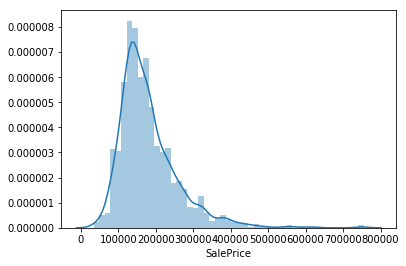

In [333]:
#train.shape
id_train=train["Id"]

#statistics summary
print(train["SalePrice"].describe())
train.drop("Id",axis=1,inplace=True)
sns.distplot(train["SalePrice"])

> *Outlier Removal*
1. When outliers left, model overfits. On removing Outliers, accuracy improves.
2. We should create Robust Models, that should generalise better as training data increases.

In [334]:
train = train.drop(train[(train['GrLivArea']>3250)].index)
train = train.drop(train[(train['TotalBsmtSF']>2300)].index)
train = train.drop(train[(train['GarageArea']>1200)].index)
train = train.drop(train[(train['1stFlrSF']>2500)].index)


> *Train set and Test set joined, in order to do Feature Engineering.*

In [335]:
test=pd.read_csv('../input/test.csv')
test.drop(['Id'],inplace=True,axis=1)
ntrain,ntest = train.shape[0],test.shape
y_train = train.SalePrice.values
joineddata = pd.concat((train, test)).reset_index(drop=True)
joineddata.drop(['SalePrice'], axis=1, inplace=True)

> **Data Cleaning and Preparation**

> *Percentage of Missing Values found out. They are taken care of.*
* A missing value is features in a particular data, with no Values. That can mean anything.
* We can do two things with a missing : 1. Delete the entire row 2. Replace the missing values with some other generalised value.

In [336]:
missVal=(joineddata.isnull().sum()/len(joineddata))*100
missVal=pd.DataFrame({"Columns":missVal.index,"missPcnt":missVal.values})
missVal=missVal.drop(missVal[(missVal['missPcnt']==0)].index)
missVal=missVal.sort_values(by=['missPcnt'],ascending=False)
missVal

,Columns,missPcnt
65,PoolQC,99.723757
56,MiscFeature,96.408840
3,Alley,93.197514
25,Fence,80.421271
26,FireplaceQu,48.964088
49,LotFrontage,16.574586
33,GarageCond,5.455801
35,GarageQual,5.455801
37,GarageYrBlt,5.455801
34,GarageFinish,5.455801


> *Dealing with missing values*

In [337]:
joineddata["PoolQC"] = joineddata["PoolQC"].fillna("None")
joineddata["MiscFeature"] = joineddata["MiscFeature"].fillna("None")
joineddata["Alley"] = joineddata["Alley"].fillna("None")
joineddata["Fence"] = joineddata["Fence"].fillna("None")
joineddata["FireplaceQu"] = joineddata["FireplaceQu"].fillna("None")
joineddata["LotFrontage"] = joineddata.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    joineddata[col] = joineddata[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    joineddata[col] = joineddata[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    joineddata[col] = joineddata[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    joineddata[col] = joineddata[col].fillna('None')
joineddata["MasVnrType"] = joineddata["MasVnrType"].fillna("None")
joineddata["MasVnrArea"] = joineddata["MasVnrArea"].fillna(0)
joineddata['MSZoning'] = joineddata['MSZoning'].fillna(joineddata['MSZoning'].mode()[0])
joineddata["Functional"] = joineddata["Functional"].fillna("Typ")
joineddata['Electrical'] = joineddata['Electrical'].fillna(joineddata['Electrical'].mode()[0])
joineddata['KitchenQual'] = joineddata['KitchenQual'].fillna(joineddata['KitchenQual'].mode()[0])
joineddata['Exterior1st'] = joineddata['Exterior1st'].fillna(joineddata['Exterior1st'].mode()[0])
joineddata['Exterior2nd'] = joineddata['Exterior2nd'].fillna(joineddata['Exterior2nd'].mode()[0])
joineddata['SaleType'] = joineddata['SaleType'].fillna(joineddata['SaleType'].mode()[0])
joineddata['MSSubClass'] = joineddata['MSSubClass'].fillna("None")

> *Checked Again, if there are remaining Missing Values.*

In [338]:
missVal=(joineddata.isnull().sum()/len(joineddata))*100
missVal=pd.DataFrame({"Columns":missVal.index,"missPcnt":missVal.values})
missVal=missVal.drop(missVal[(missVal['missPcnt']==0)].index)
missVal=missVal.sort_values(by=['missPcnt'],ascending=False)
missVal

,Columns,missPcnt
74,Utilities,0.069061


> *Utilities Feature is dropped. Utilities have only two unique values but Test data contains only one of those values and thus this features is irrelevant*

In [339]:
joineddata=joineddata.drop(['Utilities'],axis=1)

> *Feature Engineering done. First 10 Features which highly correlates with SalePrice are considered here. New feature columns are created in order to create more highly correlating features.*

In [340]:
cols=["OverallQual","GrLivArea","GarageArea","GarageCars","TotalBsmtSF","FullBath","Fireplaces","MasVnrArea","TotRmsAbvGrd","1stFlrSF"]
print("Quadratics...")
for i in cols:
    joineddata[i+"2"]=joineddata[i]**2

print("Cubic...")
for i in cols:
    joineddata[i+"3"]=joineddata[i]**3

print("SquareRoot..")
for i in cols:
    joineddata[i+"SQ"]=np.sqrt(joineddata[i])

Quadratics...
Cubic...
SquareRoot..


In [341]:
#MSSubClass=The building class
joineddata['MSSubClass'] = joineddata['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
joineddata['OverallCond'] = joineddata['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
joineddata['YrSold'] = joineddata['YrSold'].astype(str)
joineddata['MoSold'] = joineddata['MoSold'].astype(str)

In [342]:
def PoolFlag(col):
    if col['PoolArea'] == 0:
        return 0
    else:
        return 1
    
joineddata['HasPool_Flag'] = joineddata.apply(PoolFlag, axis=1)
joineddata.drop('PoolArea', axis=1, inplace=True)

> *Features which affects SalePrice (Influnces SalePrice) and are Ordinal in nature are replaced by hand, below*

In [343]:
joineddata["BsmtQual"]=joineddata["BsmtQual"].map({"None":0,"Fa":1,"TA":2,"Gd":3,"Ex":4})
joineddata['BsmtCond'] = joineddata['BsmtCond'].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
joineddata['BsmtExposure'] = joineddata['BsmtExposure'].map({"None":0, "No":1, "Mn":2, "Av":3, "Gd":4})
joineddata["KitchenQual"]=joineddata["KitchenQual"].map({"Fa":1,"TA":2,"Gd":3,"Ex":4})
joineddata['ExterQual'] = joineddata['ExterQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4})
joineddata['HeatingQC'] = joineddata['HeatingQC'].map({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
joineddata['CentralAir'] = joineddata['CentralAir'].map({"Y":1, "N":0})
joineddata['FireplaceQu'] = joineddata['FireplaceQu'].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
joineddata['Functional'] = joineddata['Functional'].map({"Sev":1, "Maj2":2, "Maj1":3, "Mod":4, "Min2":5, "Min1":6, "Typ":7})
#joineddata['ExterQual'] = joineddata['ExterQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4})
joineddata['GarageQual'] = joineddata['GarageQual'].map({"None":"None", "Po":"Low", "Fa":"Low", "TA":"TA", "Gd":"High", "Ex":"High"})
joineddata['GarageCond'] = joineddata['GarageCond'].map({"None":"None", "Po":"Low", "Fa":"Low", "TA":"TA", "Gd":"High", "Ex":"High"})
joineddata['Condition1'] = joineddata['Condition1'].map({"Norm":"Norm", "Feedr":"Street", "PosN":"Pos", "Artery":"Street", "RRAe":"Train",
                                                    "RRNn":"Train", "RRAn":"Train", "PosA":"Pos", "RRNe":"Train"})
joineddata['Condition2'] = joineddata['Condition2'].map({"Norm":"Norm", "Feedr":"Street", "PosN":"Pos", "Artery":"Street", "RRAe":"Train",
                                                    "RRNn":"Train", "RRAn":"Train", "PosA":"Pos", "RRNe":"Train"})
joineddata['LotConfig'] = joineddata['LotConfig'].map({"Inside":"Inside", "FR2":"FR", "Corner":"Corner", "CulDSac":"CulDSac", "FR3":"FR"})
joineddata['LandSlope'] = joineddata['LandSlope'].map({"Gtl":1, "Mod":2, "Sev":2})
joineddata['Heating'] = joineddata['Heating'].map({"GasA":1, "GasW":0, "Grav":0, "Wall":0, "OthW":0, "Floor":0})
#joineddata['HeatingQC'] = joineddata['HeatingQC'].map({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
#joineddata['Functional'] = joineddata['Functional'].map({"Sev":1, "Maj2":2, "Maj1":3, "Mod":4, "Min2":5, "Min1":6, "Typ":7})



In [344]:
def ConditionMatch(col):
    if col['Condition1'] == col['Condition2']:
        return 0
    else:
        return 1
    
joineddata['Diff2ndCondition_Flag'] = joineddata.apply(ConditionMatch, axis=1)
joineddata.drop('Condition2', axis=1, inplace=True)


> *Feature which do not correlate much with SalePrice and are not Ordinal, for them I created Dummy Variables*

In [345]:
colsDum=["BsmtFinType1","BsmtFinType2","MSSubClass","BldgType","HouseStyle","Foundation","RoofStyle","RoofMatl","Exterior1st","MasVnrType",
         "ExterCond","GarageType","GarageFinish","GarageQual","GarageCond","Fence","MSZoning","Neighborhood","Condition1","LotShape",
         "LandContour",'LotConfig',"Street","Alley","PavedDrive","Electrical","MoSold","SaleType","SaleCondition"]

for columnNames in colsDum:
    joineddata = pd.get_dummies(joineddata, columns = [columnNames], prefix=columnNames)

> *Insignificant Features are dropped. Correlation with SalePrice very low.*

In [346]:
joineddata.drop("Exterior2nd",axis=1,inplace=True)
joineddata.drop('MasVnrArea', axis=1, inplace=True)
joineddata.drop('PoolQC', axis=1, inplace=True)
joineddata.drop('MiscVal', axis=1, inplace=True)
joineddata.drop('MiscFeature', axis=1, inplace=True)

In [347]:
from sklearn.preprocessing import LabelEncoder
cols = ('OverallCond', 'YrSold',)

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(joineddata[c].values)) 
    joineddata[c] = lbl.transform(list(joineddata[c].values))


> *For Bathrooms, summation of all Features done.*

In [348]:
joineddata['TotalBathrooms'] = joineddata['BsmtHalfBath'] + joineddata['BsmtFullBath'] + joineddata['HalfBath'] + joineddata['FullBath']
columns = ['BsmtHalfBath', 'BsmtFullBath', 'HalfBath', 'FullBath']
joineddata.drop(columns, axis=1, inplace=True)

In [349]:
joineddata['BsmtFinSf2_Flag'] = joineddata['BsmtFinSF2'].map(lambda x:0 if x==0 else 1)
joineddata.drop('BsmtFinSF2', axis=1, inplace=True)

joineddata['LowQualFinSF_Flag'] = joineddata['LowQualFinSF'].map(lambda x:0 if x==0 else 1)
joineddata.drop('LowQualFinSF', axis=1, inplace=True)

In [350]:
# New Features made by adding Square feet of all other features given
joineddata['TotalSF'] = joineddata['TotalBsmtSF'] + joineddata['1stFlrSF'] + joineddata['2ndFlrSF']

> *Generally Machine Learning algorithms fit well on data that are Normally Distributed. We saw on our EDA that the data is not distributed Normally and positively skewed. So I transformed the data into a Normally Distributed data statistically by applying a log function to the SalePrice Features (Target variable).*

In [351]:
train["SalePrice"] = np.log1p(train["SalePrice"])
y_train = train["SalePrice"]

In [352]:
cols = joineddata.columns
num_cols = joineddata._get_numeric_data().columns
num_cols
categoricalData=list(set(cols) - set(num_cols))
categoricalData
#for columnNames in categoricalData:
#    joinedata = pd.get_dummies(joineddata, columns = columnNames, prefix=columnNames)

#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder(categorical_features = [0])

#x = onehotencoder.fit_transform(x).toarray()

[]

> *Features which are Skewed are taken care of below. Again the same problem, Features that are positively skewed or negatively skewed must be taken care of, inorder to maintain the distribution of the data.*

> Features having skew > 0.5 are transformed. I used Box Cox transformation here.

In [353]:
#import numpy as np
from scipy.stats import kurtosis, skew
numeric_feats = joineddata.dtypes[joineddata.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = joineddata[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)
skewness = skewness[abs(skewness) > 0.5]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    joineddata[feat] = boxcox1p(joineddata[feat], lam)


Skew in numerical features: 

There are 268 skewed numerical features to Box Cox transform


In [354]:
train = joineddata[:ntrain]
test = joineddata[ntrain:]

In [355]:
print(train.shape)
print(test.shape)

(1437, 268)
(1459, 268)


> *Necessary libraries are imported for Model Making.*

In [356]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, ShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
import xgboost as xgb
import lightgbm as lgb
print("Packages Imported..")

Packages Imported..


In [357]:
X_train, X_test, Y_train, Y_test = train_test_split(train, y_train, test_size=0.2, random_state=42)
print('X_train: '+ str(X_train.shape)) 
print('X_test: ' + str(X_test.shape)) 
print('Y_train: '+ str(Y_train.shape))
print('Y_test: ' + str(Y_test.shape))

X_train: (1149, 268)
X_test: (288, 268)
Y_train: (1149,)
Y_test: (288,)


In [358]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

> *LASSO Regression Model. LASSO (Least Absolute Shrinkage Selector Operator), is similar to ridge. Lasso model mostly predicts better than both linear and ridge.*

In [359]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.00022000000000000003, copy_X=True, fit_intercept=True,max_iter=1000, 
                                            normalize=False, positive=False, precompute=False,random_state=None, selection='cyclic', 
                                            tol=0.0001, warm_start=False))

> *Elastic Net Model*

In [360]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.00020000000000000001, copy_X=True, fit_intercept=True,
                                                l1_ratio=0.90000000000000002, max_iter=100000, normalize=False,
                                                positive=False, precompute=False, random_state=None,selection='cyclic', tol=0.0001, 
                                                warm_start=False))


In [361]:
GradientBoost = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,learning_rate=0.1, loss='ls', 
                                          max_depth=2, max_features=None,max_leaf_nodes=None, min_impurity_decrease=0.0,
                                          min_impurity_split=None, min_samples_leaf=1,min_samples_split=7, min_weight_fraction_leaf=0.0,
                                          n_estimators=350, n_iter_no_change=None, presort='auto',random_state=None, subsample=1.0, 
                                          tol=0.0001,validation_fraction=0.1, verbose=0, warm_start=False)

> *Kernel Ridge Regression Model. KRR combines ridge regression with the kernel trick. *

In [362]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=1, coef0=2.5)

> *Comparing Different Model: lasso,Elastic Net, Kernel Ridge and Gradient Boosting on Train Data*

In [363]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GradientBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1104 (0.0062)

ElasticNet score: 0.1110 (0.0064)

Kernel Ridge score: 0.1264 (0.0067)

Gradient Boosting score: 0.1192 (0.0073)



> *XgBoost Regression Model*

In [364]:
model_xgb = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0, learning_rate=0.1, 
                             max_delta_step=0,max_depth=2, min_child_weight=1, missing=None, n_estimators=2000,n_jobs=1, nthread=None, 
                             objective='reg:linear', random_state=0,reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,silent=True, 
                             subsample=1)

In [365]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [366]:
model_xgb.fit(X_train, Y_train)
xgb_train_pred = model_xgb.predict(X_test)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(Y_test, xgb_train_pred))

0.10835559606509887


> *LightGBM Regressor Model*

In [367]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,learning_rate=0.05, n_estimators=1200,max_bin = 55, 
                              bagging_fraction = 0.8,bagging_freq = 5, feature_fraction = 0.2319,feature_fraction_seed=9, 
                              bagging_seed=11,min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [368]:
model_lgb.fit(X_train, Y_train)
lgb_train_pred = model_lgb.predict(X_test)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(Y_test, lgb_train_pred))

0.10930425997851848


> *Now we have a set of tuned Regression Algorithms. We use a successful technique Stacking here, in order to improve accuracy.*

> *Stacking : I used Gradient Boosting, Elastic Net and KRR as the Base Estimators and LASSO as the meta model here in Stacking.*

In [369]:
from mlxtend.regressor import StackingCVRegressor
stackModel = StackingCVRegressor(regressors=(GradientBoost, ENet,KRR),meta_regressor=lasso,use_features_in_secondary=True)

In [370]:
stackModel.fit(X_train, Y_train)
stacked_Model_pred =stackModel.predict(X_test)
stacked_Model_final = np.expm1(stackModel.predict(test.values))
print(rmsle(Y_test, stacked_Model_pred))

0.09668403536849184


In [371]:
print('RMSLE score on train data:')
print(rmsle(Y_test,stacked_Model_pred*0.90 +xgb_train_pred*0.05 + lgb_train_pred*0.05 ))

RMSLE score on train data:
0.0957010892947412


> *Ensemble Model*

In [372]:
modelNew=(.90*stacked_Model_final)+(.05*xgb_pred)+(.05*lgb_pred)
#print(modelNew.shape)
test=pd.read_csv('../input/test.csv')
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = modelNew
sub.to_csv('submission.csv',index=False)